# logistic Regression Implementation


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline


In [2]:
from sklearn.datasets import make_classification



In [3]:
x ,y =  make_classification(n_samples= 1000 , n_features = 10 , n_classes = 2 , random_state = 42)

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2 , random_state = 42)


## model training 


In [5]:
from sklearn.linear_model import LogisticRegression
Logistic = LogisticRegression()


In [6]:
Logistic.fit(x_train , y_train)

LogisticRegression()

In [7]:
y_pred = Logistic.predict(x_test)

In [8]:

print(y_pred)

[0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 1 1 1 1 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 1
 1 1 1 0 1 1 0 0 0 1 1 1 1 0 1 1 0 1 0 1 0 1 0 1 0 0 1 1 1 0 0 1 1 1 1 1 0
 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 1 1 1 1 1 1 0 0 1 0 1 0 1 0 0 1 0 1 1 1 1
 1 1 1 1 0 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 0 0 0 0 0 1 0
 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1
 0 0 0 0 1 0 0 0 0 1 0 0 1 1 1]


In [9]:
Logistic.predict_proba(x_test)

array([[7.78600959e-01, 2.21399041e-01],
       [3.19099883e-02, 9.68090012e-01],
       [6.42146681e-01, 3.57853319e-01],
       [7.47380192e-02, 9.25261981e-01],
       [9.75407948e-01, 2.45920523e-02],
       [3.99148910e-02, 9.60085109e-01],
       [9.78737182e-01, 2.12628178e-02],
       [9.52833227e-01, 4.71667733e-02],
       [7.87837418e-01, 2.12162582e-01],
       [6.81333736e-01, 3.18666264e-01],
       [9.15901071e-01, 8.40989288e-02],
       [2.42589360e-01, 7.57410640e-01],
       [5.03410713e-01, 4.96589287e-01],
       [1.92363097e-01, 8.07636903e-01],
       [7.93085129e-01, 2.06914871e-01],
       [9.43576898e-01, 5.64231015e-02],
       [2.69367304e-02, 9.73063270e-01],
       [3.41710994e-01, 6.58289006e-01],
       [3.08678280e-01, 6.91321720e-01],
       [1.74169127e-01, 8.25830873e-01],
       [4.84677714e-01, 5.15322286e-01],
       [9.62607338e-01, 3.73926615e-02],
       [1.81990356e-01, 8.18009644e-01],
       [7.82536737e-01, 2.17463263e-01],
       [8.635545

In [10]:
from sklearn.metrics  import accuracy_score,confusion_matrix,classification_report


In [11]:
score = accuracy_score(y_test,y_pred)
print(score)
cm = confusion_matrix(y_test,y_pred) #confusion
print(cm)
print(classification_report(y_test,y_pred))

0.83
[[75 14]
 [20 91]]
              precision    recall  f1-score   support

           0       0.79      0.84      0.82        89
           1       0.87      0.82      0.84       111

    accuracy                           0.83       200
   macro avg       0.83      0.83      0.83       200
weighted avg       0.83      0.83      0.83       200



# hyperparameter tuning And Cross Validation 

In [12]:
model = LogisticRegression()
penatly = ['l1','l2','elasticnet']
c_values = [100,10,1.0,0.1,0.01]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']

In [13]:
parms = dict(penalty = penatly , c = c_values , solver = solver)

# Grid Search CV


In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold()
grid = GridSearchCV(estimator=model , param_grid=parms , cv=cv)


In [15]:
grid

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'c': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [16]:
# ===============================
# Logistic Regression with GridSearchCV
# ===============================

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score

# Define the model
model = LogisticRegression(max_iter=5000)

# Define parameter grid (all valid combinations)
param_grid = [
    # For solvers that support both l1 and l2
    {'solver': ['liblinear'], 'penalty': ['l1', 'l2'], 'C': [100, 10, 1.0, 0.1, 0.01]},
    
    # For solvers that support only l2
    {'solver': ['lbfgs', 'newton-cg', 'sag'], 'penalty': ['l2'], 'C': [100, 10, 1.0, 0.1, 0.01]},
    
    # For solver that supports elasticnet as well
    {'solver': ['saga'], 'penalty': ['l1', 'l2', 'elasticnet'], 
     'C': [100, 10, 1.0, 0.1, 0.01], 'l1_ratio': [0.1, 0.5, 0.9]}
]

# Define cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create GridSearchCV
grid = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=cv,
    scoring='accuracy',
    n_jobs=-1,       # use all CPU cores
    verbose=2
)

# Fit the grid search
grid.fit(x_train, y_train)

# Print results
print("✅ Grid Search Complete!")
print("Best Parameters Found:", grid.best_params_)
print("Best Cross-Validation Accuracy:", grid.best_score_)

# Evaluate on test set (optional)
best_model = grid.best_estimator_
y_pred = best_model.predict(x_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))


Fitting 5 folds for each of 70 candidates, totalling 350 fits
✅ Grid Search Complete!
Best Parameters Found: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Cross-Validation Accuracy: 0.8762500000000001
Test Accuracy: 0.825


In [17]:
grid.best_estimator_

LogisticRegression(C=0.01, max_iter=5000)

In [18]:
grid.best_score_

0.8762500000000001

In [19]:
grid.best_params_

{'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}

# Logistic regresssion for Imbalanaced dataset

In [20]:
from collections import Counter
from sklearn.datasets import make_classification


In [21]:
x ,y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=0,n_clusters_per_class=1, random_state=42,weights=[0.99])

In [22]:
x

array([[-1.09310756,  0.60982908, -1.07955041, ...,  2.29599588,
         0.7232602 ,  1.79838398],
       [-2.02081758, -1.37757638,  0.08528407, ...,  1.35314039,
         1.34641655,  2.5257908 ],
       [-2.03155131, -0.45693484, -0.11119144, ..., -0.01924252,
         0.69096111, -0.45269351],
       ...,
       [-0.98758   , -1.56861267, -0.16193815, ...,  1.19510163,
         1.12770986,  0.69990079],
       [-0.88949174, -0.44469003,  1.37545968, ...,  1.71084022,
         1.23436482, -1.1877522 ],
       [ 1.45524264,  0.43345524,  0.83525957, ...,  2.72835607,
        -0.42171106,  2.97029711]])

In [23]:
Counter(y)

Counter({0: 980, 1: 20})

<Axes: xlabel='0', ylabel='1'>

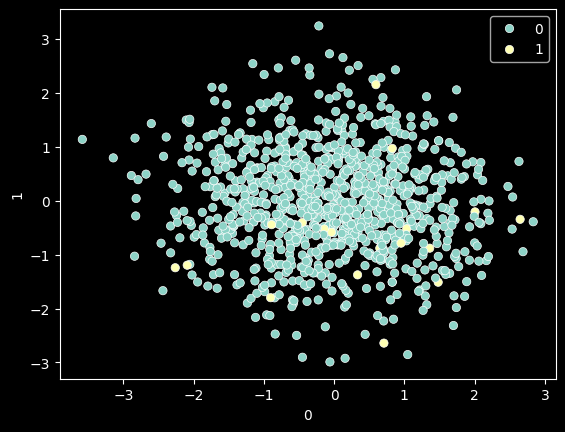

In [25]:
import pandas as pd
import seaborn as sns

# Convert x to DataFrame if it's not already
df = pd.DataFrame(x)

# Create scatterplot
sns.scatterplot(x=df[0], y=df[1], hue=y)


In [26]:
sns.set_style("whitegrid")

<Axes: xlabel='0', ylabel='1'>

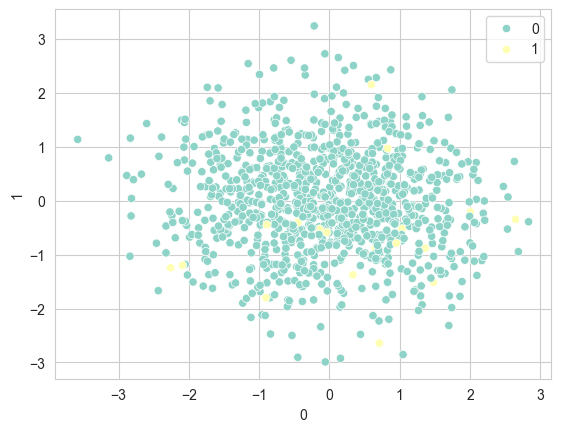

In [27]:
import pandas as pd
import seaborn as sns

# Convert x to DataFrame if it's not already
df = pd.DataFrame(x)

# Create scatterplot
sns.scatterplot(x=df[0], y=df[1], hue=y)


In [30]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)


In [31]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
penatly = ['l1','l2','elasticnet']
c_values = [100,10,1.0,0.1,0.01]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']
class_weight = [{0:w,1:y} for w in [1,10,50,100] for y in [1,10,50,100]]

In [44]:
params = dict(penalty = penatly , C = c_values , solver = solver , class_weight = class_weight)

In [45]:
params

{'penalty': ['l1', 'l2', 'elasticnet'],
 'C': [100, 10, 1.0, 0.1, 0.01],
 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
 'class_weight': [{0: 1, 1: 1},
  {0: 1, 1: 10},
  {0: 1, 1: 50},
  {0: 1, 1: 100},
  {0: 10, 1: 1},
  {0: 10, 1: 10},
  {0: 10, 1: 50},
  {0: 10, 1: 100},
  {0: 50, 1: 1},
  {0: 50, 1: 10},
  {0: 50, 1: 50},
  {0: 50, 1: 100},
  {0: 100, 1: 1},
  {0: 100, 1: 10},
  {0: 100, 1: 50},
  {0: 100, 1: 100}]}

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold()
grid = GridSearchCV(estimator=model , param_grid=params , cv=cv , scoring='accuracy'
)


In [47]:
grid.fit(x_train , y_train  )

c:\Users\suyas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\suyas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\suyas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\suyas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\suyas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the 

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 50}, {0: 1, 1: 100},
                                          {0: 10, 1: 1}, {0: 10, 1: 10},
                                          {0: 10, 1: 50}, {0: 10, 1: 100},
                                          {0: 50, 1: 1}, {0: 50, 1: 10},
                                          {0: 50, 1: 50}, {0: 50, 1: 100},
                                          {0: 100, 1: 1}, {0: 100, 1: 10},
                                          {0: 100, 1: 50}, {0: 100, 1: 100}],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [48]:
print("Best parameters:", grid.best_params_)
print("Best score:", grid.best_score_)

Best parameters: {'C': 100, 'class_weight': {0: 1, 1: 1}, 'penalty': 'l2', 'solver': 'sag'}
Best score: 0.9866666666666667


In [51]:
y_pred = grid.predict(x_test)

In [52]:
from sklearn.metrics  import accuracy_score,confusion_matrix,classification_report


In [53]:
score = accuracy_score(y_test,y_pred)
print(score)
cm = confusion_matrix(y_test,y_pred) #confusion
print(cm)
print(classification_report(y_test,y_pred))

0.984
[[245   0]
 [  4   1]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       245
           1       1.00      0.20      0.33         5

    accuracy                           0.98       250
   macro avg       0.99      0.60      0.66       250
weighted avg       0.98      0.98      0.98       250



# Logistic Regression With ROC curve And ROC AUC score 

In [54]:
#roc curce and auc
from sklearn.metrics import roc_curve, roc_auc_score

In [55]:
x,y = make_classification(n_samples= 1000 , n_features = 10 , n_classes = 2 , random_state = 1)    

In [56]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25 , random_state = 42)


In [57]:
dummy_model_prob = [0 for _ in range(len(y_test))]
dummy_model_prob

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [58]:
model = LogisticRegression()
model.fit(x_train , y_train)    


LogisticRegression()

In [59]:
model_prob = model.predict_proba(x_test)    
model_prob = model_prob[:,1]

In [60]:
dummy_model_auc = roc_auc_score(y_test , dummy_model_prob)
model_auc = roc_auc_score(y_test , model_prob)

print("Dummy model AUC:", dummy_model_auc)
print("Model AUC:", model_auc)

Dummy model AUC: 0.5
Model AUC: 0.922092055566225
